In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
# Constants
h = 6.602e-34
hbar = h/(2*np.pi)
kB = 1.38e-23
eps_0 = 8.85e-12
c_0 = 299792458
e = 1.602e-19
m_e = 9.109e-31
a_0 = 0.53e-10
norm = 1e-9
mu_B = e*hbar/(2*m_e)

In [3]:
#Internal basis vectors expressed in lab frame. SiV high symmetry axis is along z: <111>
x = np.array([-1,1,0])
x = x/np.linalg.norm(x)
y = np.array([-1,-1,2])
y = y/np.linalg.norm(y)
z = np.array([1,1,1])
z = z/np.linalg.norm(z)

#Rotation matrix to switch from internal to external lab frame
R_ext_int = np.vstack((x,y,z)).T
R_int_ext = np.linalg.inv(R_ext_int)

In [16]:
''' 
    States and operators:
    Orbitals ordering
    0: |e_gx>
    1: |e_gy>
    2: |e_ux>
    3: |e_uy>

    Therefore orbital plus operator L_p_x = |e_g_y><e_g_x| ... 
    Due to D3d symmetry only L_z is non-zero. L_x and L_y vanish.

    Define spin up |🠕> as lower energy state.
'''
N_orbs = 4 
e_g_x = basis(N_orbs, 0)
e_g_y = basis(N_orbs, 1)
e_u_x = basis(N_orbs, 2)
e_u_y = basis(N_orbs, 3)
L_g_p = e_g_y*e_g_x.dag()
L_g_m = L_g_p.trans()
L_e_p = e_u_y*e_u_x.dag()
L_e_m = L_e_p.trans()
L_z_g = 1j*e_g_x*e_g_y.dag()-1j*e_g_y*e_g_x.dag()
L_z_e = 1j*e_u_x*e_u_y.dag()-1j*e_u_y*e_u_x.dag()

N_spins = 2
s_up = basis(N_spins,0)
s_down = basis(N_spins,1)
S_m = s_down*s_up.dag()
S_p = s_up*s_down.dag()
S_x = (S_m + S_p)
S_y = (-1j*S_m + 1j*S_p)
S_z = s_up*s_up.dag() - s_down*s_down.dag()
N = N_orbs*N_spins

In [17]:
'''System Dynamics:
Orbital part comprising Spin-Orbit, Jahn Teller, Zeeman and Strain couplin
'''
HOrb = Qobj(np.zeros((N_orbs, N_orbs)))
HOrb += 1.68*e/h*(e_u_x*e_u_x.dag()+e_u_y*e_u_y.dag())
HSys = tensor(HOrb, qeye(N_spins))

In [18]:
#Spin-Orbit coupling
SO_g = 46e9
SO_e = 250e9
HSO = -SO_g/2*tensor(L_z_g,S_z) - SO_e/2*tensor(L_z_e,S_z)
HSys += HSO

In [19]:
#Jahn-Teller coupling
JT_x_g = 0
JT_x_e = 0
JT_y_g = 0
JT_y_e = 0
HJT = JT_x_g*e_g_x*e_g_x.dag()
HJT += JT_y_g*e_g_x*e_g_y.dag()
HJT += JT_y_g*e_g_y*e_g_x.dag()
HJT += -JT_x_g*e_g_y*e_g_y.dag()
HJT += JT_x_e*e_u_x*e_u_x.dag()
HJT += JT_y_e*e_u_x*e_u_y.dag()
HJT += JT_y_e*e_u_y*e_u_x.dag()
HJT += -JT_x_e*e_u_y*e_u_y.dag()
HSys += tensor(HJT, qeye(N_spins))

In [20]:
#Strain coupling
delta_g = 0
alpha_g = 0
beta_g = 0
HStr_g = (delta_g+alpha_g)*e_g_x*e_g_x.dag()
HStr_g += beta_g*e_g_x*e_g_y.dag()
HStr_g += beta_g*e_g_y*e_g_x.dag()
HStr_g += (delta_g-alpha_g)*e_g_y*e_g_y.dag()

delta_e = 0
alpha_e = 0
beta_e = 0
HStr_e = (delta_e+alpha_e)*e_u_x*e_u_x.dag()
HStr_e += beta_e*e_u_x*e_u_y.dag()
HStr_e += beta_e*e_u_y*e_u_x.dag()
HStr_e += (delta_e-alpha_e)*e_u_y*e_u_y.dag()

HStr = HStr_g + HStr_e

HSys += tensor(HStr, qeye(N_spins))

In [21]:
HSys.eigenstates()

(array([-2.30000000e+10, -2.30000000e+10,  2.30000000e+10,  2.30000000e+10,
         4.07533285e+14,  4.07533285e+14,  4.07783285e+14,  4.07783285e+14]),
 array([Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.70710678+0.j        ]
  [0.        +0.j        ]
  [0.        -0.70710678j]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]],
        Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[ 0.        +0.j        ]
  [ 0.        +0.70710678j]
  [ 0.        +0.j        ]
  [-0.70710678+0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]],
        Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[-0.70710678+0.j        ]
  [ 0.        +0.j        ]
  [ 0.        -0.70710678j]
  [ 0.        +0.j        ]
  [ 0.        +0.j     

In [12]:
e_u_p = -1/np.sqrt(2)*(1*e_u_x+1j*e_u_y)
e_u_m = 1/np.sqrt(2)*(1*e_u_x-1j*e_u_y)
e_g_p = -1/np.sqrt(2)*(1*e_g_x+1j*e_g_y)
e_g_m = 1/np.sqrt(2)*(1*e_g_x-1j*e_g_y)

In [28]:
(-SO_g/2*tensor(L_z_g,S_z)).eigenstates()

(array([-2.3e+10, -2.3e+10,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         2.3e+10,  2.3e+10]),
 array([Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.70710678+0.j        ]
  [0.        +0.j        ]
  [0.        -0.70710678j]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]
  [0.        +0.j        ]],
        Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[ 0.        +0.j        ]
  [ 0.        +0.70710678j]
  [ 0.        +0.j        ]
  [-0.70710678+0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]
  [ 0.        +0.j        ]],
        Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]],
        Quantum object: dims = [[4, 2], [1, 1]], shape = (8, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  

In [32]:
# Environmental interactions
T = 2

n_th_pht = np.exp(-h*c_0/737e-9/(kB*T))
n_th_phn_g = np.exp(-h*46e9/(kB*T))
n_th_phn_e = np.exp(-h*250e9/(kB*T))
print("Mean phonon 46GHz occupation: ", n_th_phn_g)
print("Mean phonon 250GHz occupation: ", n_th_phn_g)
print("Mean photon occupation: ", n_th_pht)

tau_pht_A = 1.7e-9
tau_pht_B = 1.7e-9
tau_pht_C = 1.7e-9
tau_pht_D = 1.7e-9

tau_phn_e = 200e-12
tau_phn_g = 400e-12

c_ops = []

e_u_p = -1/np.sqrt(2)*(1*e_u_x+1j*e_u_y)
e_u_m = 1/np.sqrt(2)*(1*e_u_x-1j*e_u_y)
e_g_p = -1/np.sqrt(2)*(1*e_g_x+1j*e_g_y)
e_g_m = 1/np.sqrt(2)*(1*e_g_x-1j*e_g_y)

#Phononic relaxation in the ground state
# Downward e_g_y --> e_g_x
# c_ops.append(np.sqrt(1/tau_phn_g*(n_th_phn_g+1))*tensor(e_g_x*e_g_y.dag(),qeye(N_spins)))
# Upward e_g_x --> e_g_y
# c_ops.append(np.sqrt(1/tau_phn_g*n_th_phn_g)*tensor(e_g_y*e_g_x.dag(),qeye(N_spins)))

#Phononic relaxation in the excited state
# Downward e_u_y --> e_u_x
# c_ops.append(np.sqrt(1/tau_phn_e*(n_th_phn_e+1))*tensor(e_u_x*e_u_y.dag(),qeye(N_spins)))
# Upward e_u_x --> e_u_y
# c_ops.append(np.sqrt(1/tau_phn_e*n_th_phn_e)*tensor(e_u_y*e_u_x.dag(),qeye(N_spins)))

# #Photonic relaxation
# #A transition
# c_ops.append(np.sqrt(1/tau_pht_A*(n_th_pht+1))*tensor(e_g_x*e_u_y.dag(), qeye(N_spins)))
# c_ops.append(np.sqrt(1/tau_pht_A*n_th_pht)*tensor(e_u_y*e_g_x.dag(), qeye(N_spins)))
# # #B transition
# c_ops.append(np.sqrt(1/tau_pht_B*(n_th_pht+1))*tensor(e_g_y*e_u_y.dag(), qeye(N_spins)))
# c_ops.append(np.sqrt(1/tau_pht_B*n_th_pht)*tensor(e_u_y*e_g_y.dag(), qeye(N_spins)))
# # #C transition
c_ops.append(np.sqrt(1/tau_pht_C*(n_th_pht+1))*tensor(e_g_p*e_u_p.dag(), qeye(N_spins)))
c_ops.append(np.sqrt(1/tau_pht_C*n_th_pht)*tensor(e_u_p*e_g_p.dag(), qeye(N_spins)))
# # #D transition
# c_ops.append(np.sqrt(1/tau_pht_D*(n_th_pht+1))*tensor(e_g_y*e_u_x.dag(), qeye(N_spins)))
# c_ops.append(np.sqrt(1/tau_pht_D*n_th_pht)*tensor(e_u_x*e_g_y.dag(), qeye(N_spins)))

Mean phonon 46GHz occupation:  0.33276014516096364
Mean phonon 250GHz occupation:  0.33276014516096364
Mean photon occupation:  0.0


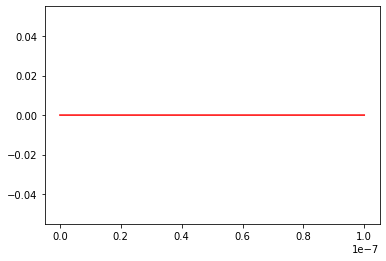

In [33]:
def drive(t, args):    
    args={'Omega':1e9, 't0': 10e-9, 'a':60e-9}
    return args['Omega']*rect(t, args['t0'], args['a'])

def rect(t, t0, a):           
    if t>t0 and t0+a>t:
        return 1
    else: 
        return 0

HL =  tensor(e_g_p*e_u_p.dag(),s_up*s_up.dag()) + tensor(e_u_p*e_g_p.dag(),s_up*s_up.dag())
H = [HSys, [HL, drive]]

t = np.linspace(0,100e-9,5000)
# plt.plot(t, [drive(ti, []) for ti in t], '-b')
# plt.show()

psi0 = tensor(e_g_p, s_up)
options = Options()
options.nsteps = 6000
output = mesolve(H, psi0, t, c_ops, tensor(e_u_p*e_u_p.dag(), qeye(N_spins)), options=options)
plt.plot(t, output.expect[0], '-r')
plt.show()

In [ ]:
#Magnetic field unit vector
e_B_ext = np.array([[1],[1],[0]])
e_B_ext = e_B_ext/np.linalg.norm(e_B_ext)
Bs = np.linspace(0,7,100)

energies = np.zeros((N, len(Bs)))
for i, B in enumerate(Bs):

    #Zeeman coupling with quenching factor of f=0.1
    f = 0.1
    gamma_S = 2*mu_B/h
    gamma_L = mu_B/h
    
    B_ext = e_B_ext*B
    
    #Rotate into SiV internal coordinate system defined by applying (R_y*R_z)^-1
    B_x = np.squeeze(R_int_ext @ B_ext)[0]
    B_y = np.squeeze(R_int_ext @ B_ext)[1]
    B_z = np.squeeze(R_int_ext @ B_ext)[2]
        
    HZL = f*gamma_L*B_z*tensor((L_z_g+L_z_e),qeye(N_spins))    
    HZS = gamma_S*tensor(qeye(N_orbs),(B_x*S_x+B_y*S_y+B_z*S_z))
        
    energies[:,i] = (HSys+HZL+HZS).eigenenergies()

In [ ]:
labels = [
    '|e_g_x, 🠕>',
    '|e_g_x, 🠗>',
    '|e_g_y, 🠕>',
    '|e_g_y, 🠗>',
    '|e_u_x, 🠕>',
    '|e_u_x, 🠗>',
    '|e_u_y, 🠕>',
    '|e_u_y, 🠗>']
colors = [
    'k',
    'k',
    'r',
    'r',
    'b',
    'b',
    'y',
    'y'
]
styles = [
    '-',
    '-.',
    '-',
    '-.',
    '-',
    '-.',
    '-',
    '-.',
]

fig, axs = plt.subplots(3,1,True)
for i, energy in enumerate(energies):
    if i<4:
        axs[1].plot(Bs, energy, linestyle=styles[i], label=labels[i], color=colors[i])
    else:
        axs[0].plot(Bs, energy-1.68*e/h, linestyle=styles[i], label=labels[i], color=colors[i])
    
axs[0].legend()
axs[1].legend()
plt.show()

In [ ]:
#Fluorescence spectrum
tlist = np.linspace(0, 0.5e-6, 5000)
corr = correlation_2op_1t(H, None, tlist, c_ops, tensor(e_u_y*e_u_x.dag(),qeye(N_spins)), tensor(e_u_x*e_u_y.dag(),qeye(N_spins)))
wlist1, spec1 = spectrum_correlation_fft(tlist, corr)

fig, ax = plt.subplots(1, 1)
ax.plot(wlist1 / (2 * np.pi), spec1, 'b', lw=1, label='eseries method')
plt.show()
